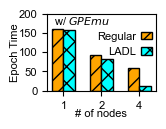

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=8
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize

fig = plt.gcf()
fig.set_dpi(100)


fig.set_size_inches(1.4, 1)

columns = ['nodes', 'DistCache', 'LocalityAware']

# ssd, 24 workers, 8 v100
df = pd.read_csv('data.csv', sep='\t', header=None, names=columns)

num_subcategories = 2
node_values = df['nodes'].tolist()
dist_values = df['DistCache'].tolist()
locality_values = df['LocalityAware'].tolist()

nodes = df['nodes'].tolist()
categories = nodes

bar_width = 0.3
index = np.arange(len(categories))

# Plotting the bar chart
plt.bar(index, dist_values, bar_width, label='Regular', color='orange', hatch="//", edgecolor="black")
plt.bar(index + 1 * bar_width, locality_values, bar_width, label='LADL', color='cyan', hatch="xx", edgecolor="black")

# plt.legend(loc="upper center", bbox_to_anchor=(1.15, 1.5), ncol=3, markerfirst=False, columnspacing=1)
plt.legend(loc="upper right", markerfirst=False, columnspacing=1, frameon=False, handlelength=1, handletextpad=0.4, bbox_to_anchor=(1.06, 0.9))
plt.annotate(r"w/ $GPEmu$", xy=(0.5, 175), xytext=(-0.1, 172))

plt.ylim(0,200)
# Adding labels and title
plt.xticks(index + (bar_width) / 2, categories, fontsize=fontsize)
plt.yticks(range(0,201,50), range(0,201,50), fontsize=fontsize)
plt.xlabel('# of nodes', fontsize=fontsize, labelpad=-1)
plt.ylabel('Epoch Time', fontsize=fontsize, labelpad=-1)
# plt.title('Distributed Cache w/wo Locality-aware',fontsize=fontsize, pad=8)

plt.savefig('speedup.eps',  bbox_inches='tight')
# Displaying the chart
plt.show()
